In [26]:
# Amazon Review Analysis

In [5]:
# Importing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [6]:
# Loading data and checking

reviews_df = pd.read_csv('amazon_alexa.csv')

In [7]:
reviews_df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [8]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
reviews_df[reviews_df['feedback'] == 0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


<Axes: >

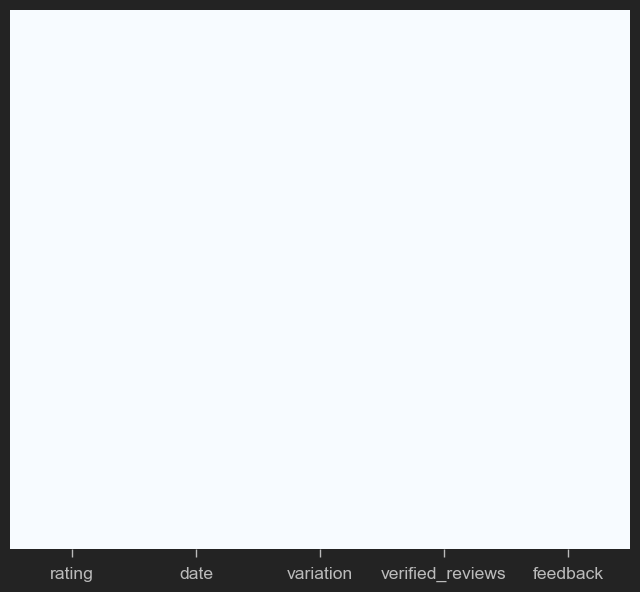

In [10]:
# Plotting null values

sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

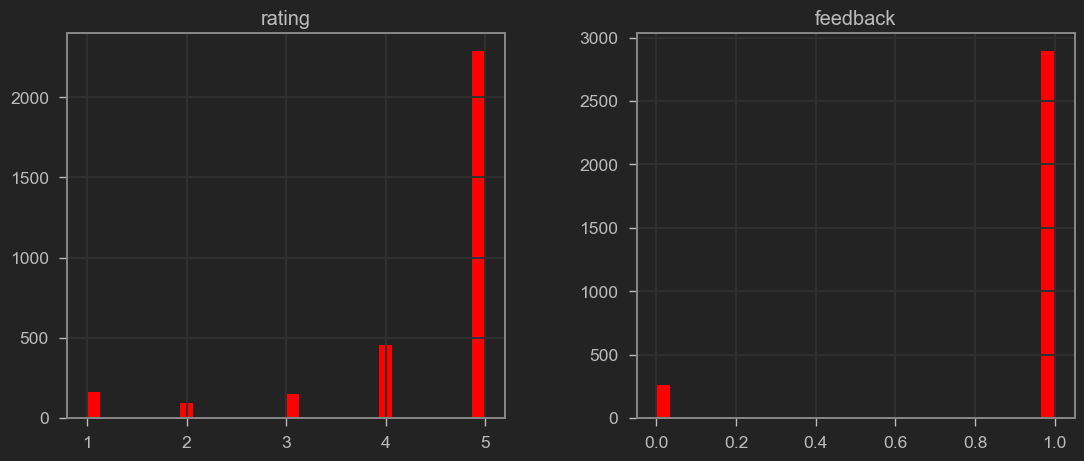

In [11]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'red')

In [12]:
reviews_df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [13]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].astype(str)

In [14]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [23]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [15]:
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049206
std,1.068506,0.273778,182.100176
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [19]:
# Let's view the shortest message 

reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [22]:
# Let's view the message with mean length 

reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

<Axes: ylabel='Frequency'>

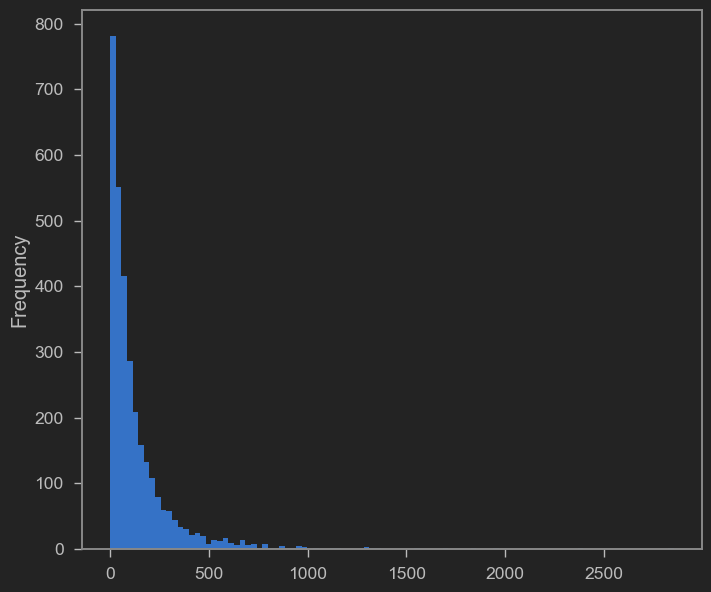

In [24]:
# Plot the histogram of the length column

reviews_df['length'].plot(bins = 100, kind = 'hist')

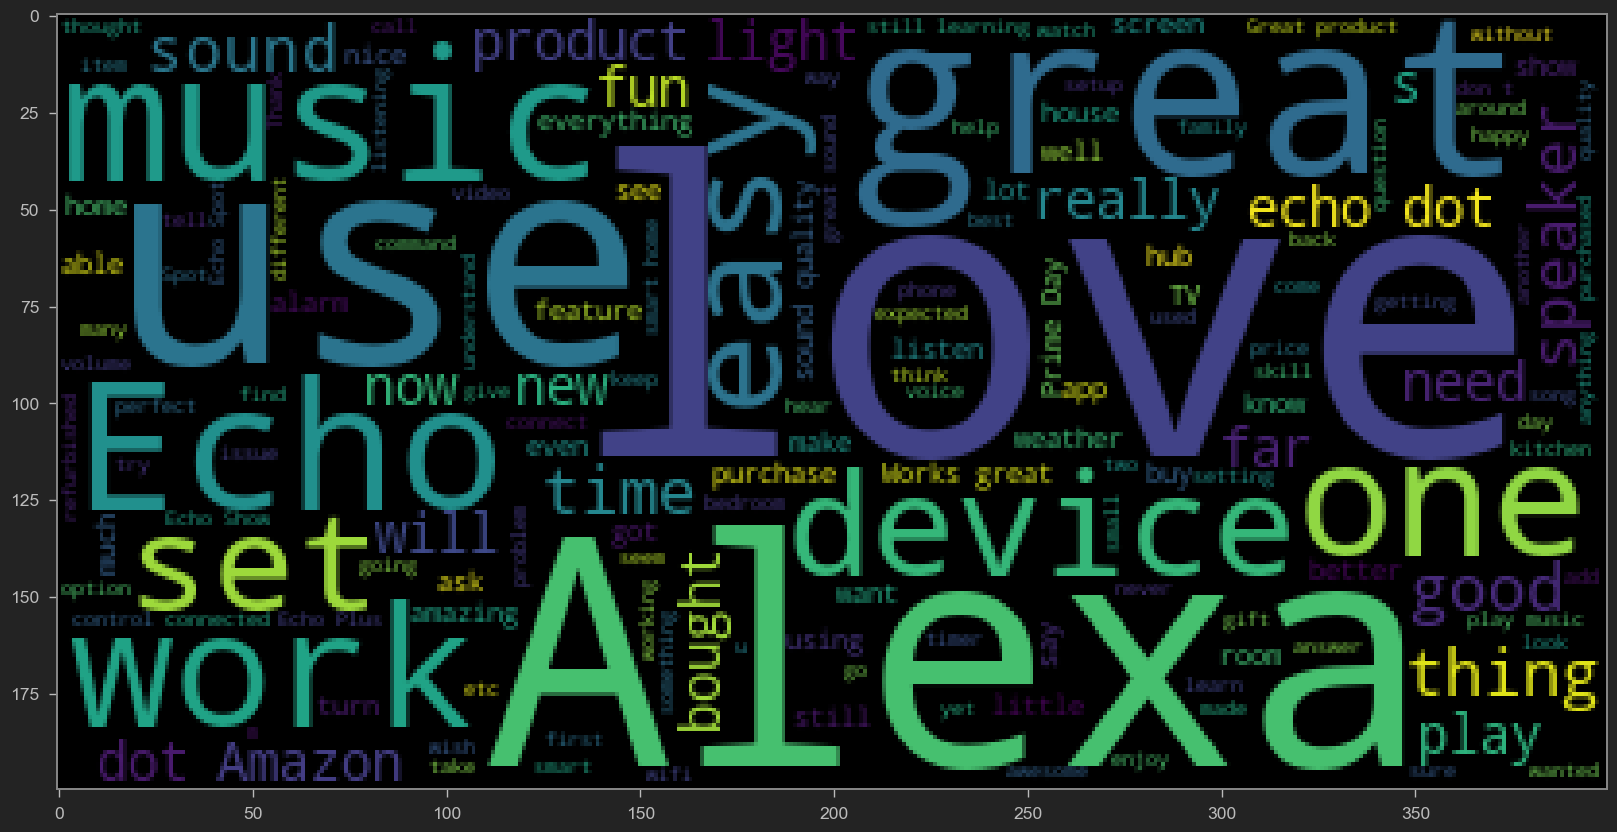

In [24]:
# Plotting WordCloud for all reviews

from wordcloud import WordCloud

sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

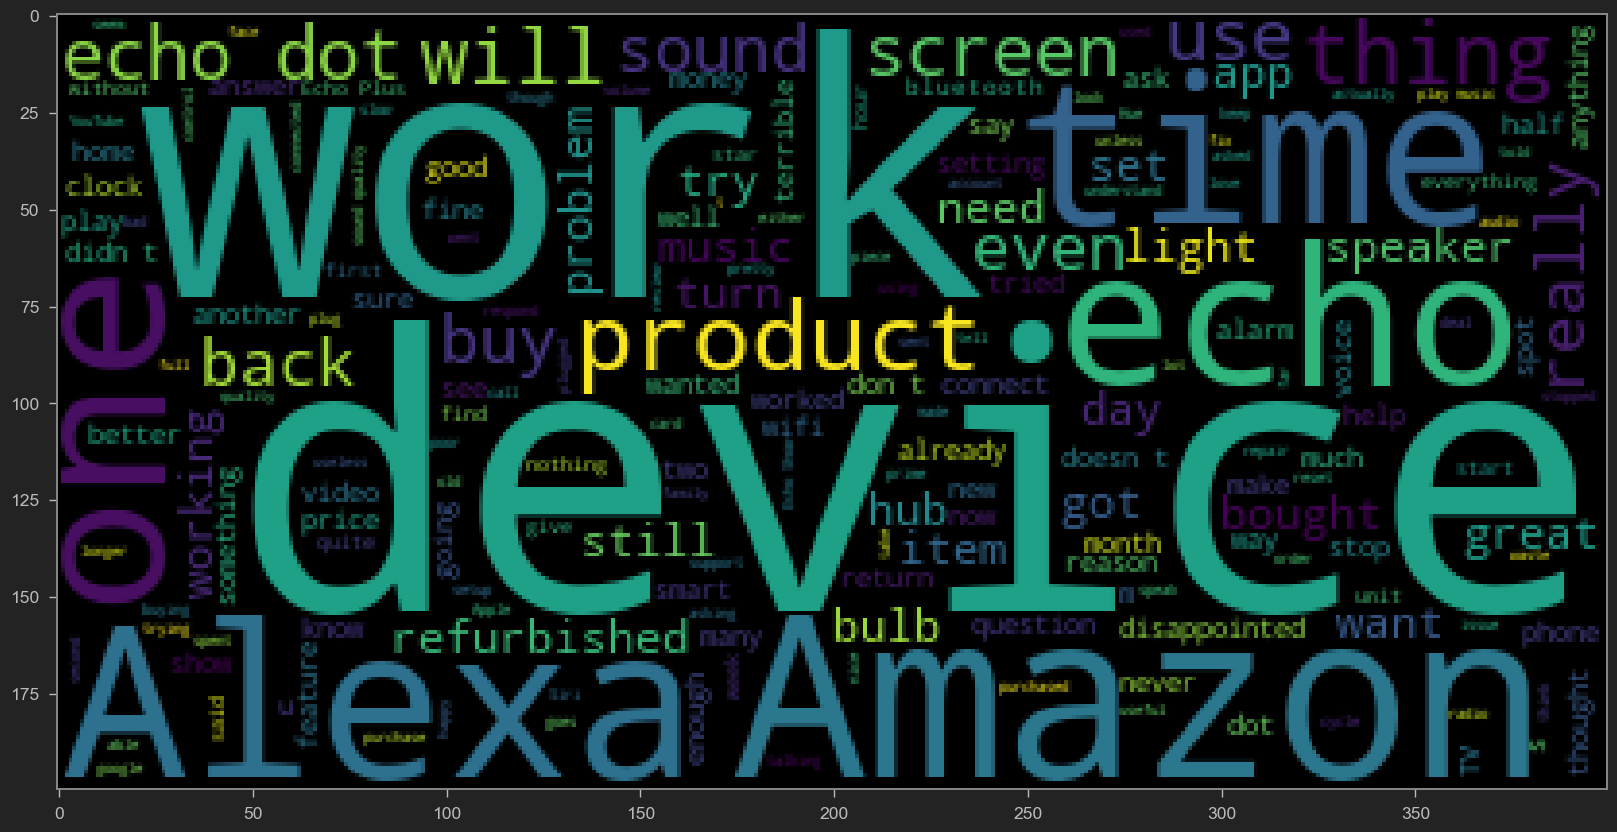

In [26]:
# Plotting WordCloud for negative reviews

negative = reviews_df[reviews_df['feedback']==0]
sentences = negative['verified_reviews'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

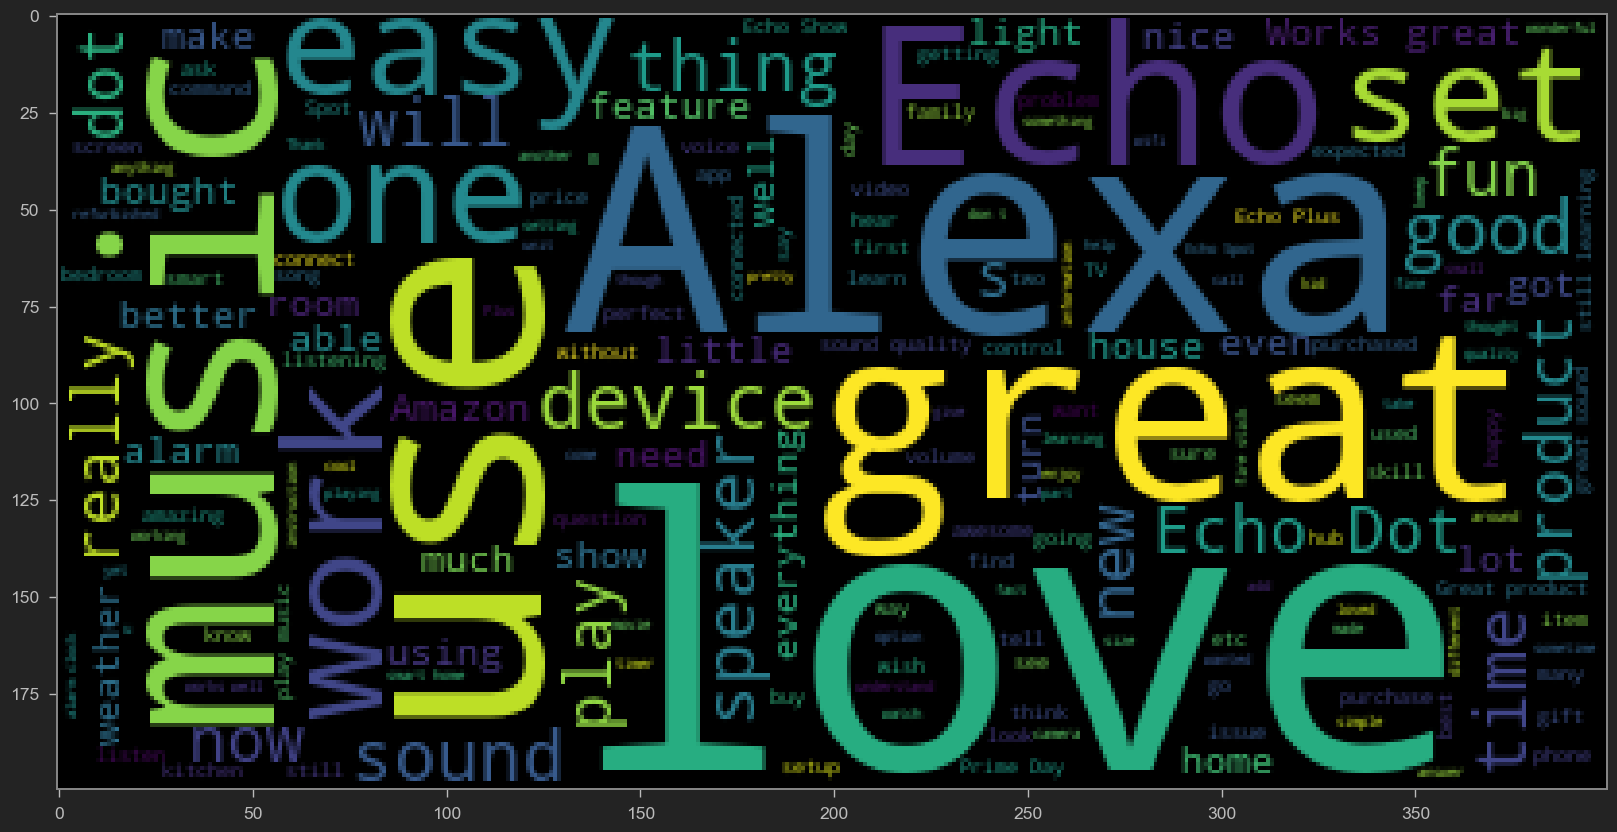

In [27]:
# Plotting WordCloud for positive reviews

negative = reviews_df[reviews_df['feedback']==1]
sentences = negative['verified_reviews'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [30]:
# Cleaning and preparing the reviews

import string
# string.punctuation
import nltk
from nltk.corpus import stopwords
# stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# Removing stopwords and punctuation function

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [32]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [33]:
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [35]:
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [39]:
# Creating vector matrix

vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [40]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [41]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
reviews_countvectorizer.shape

(3150, 5212)

In [43]:
X = pd.DataFrame(reviews_countvectorizer.toarray())

In [44]:
X

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = reviews_df['feedback']

In [48]:
y.fillna(0,inplace=True)

In [46]:
X.shape

(3150, 5212)

In [47]:
y.shape

(3150,)

In [49]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
# Training classification naive bayes model

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

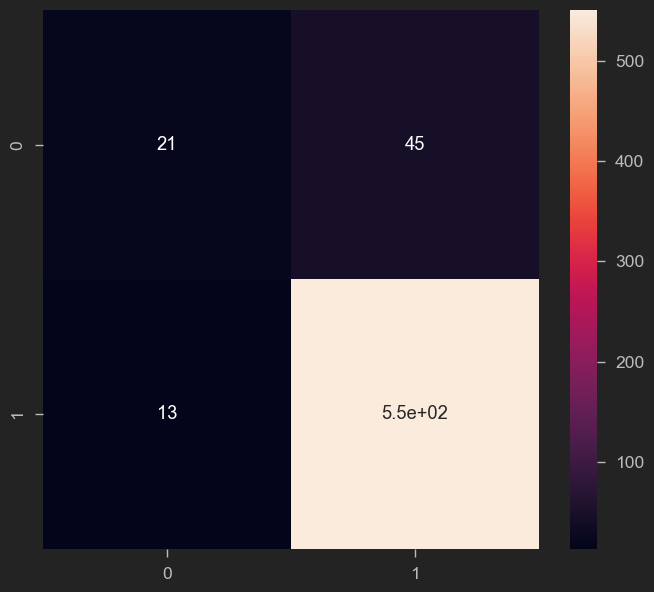

In [52]:
# Evaluation

from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.62      0.32      0.42        66
           1       0.92      0.98      0.95       564

    accuracy                           0.91       630
   macro avg       0.77      0.65      0.68       630
weighted avg       0.89      0.91      0.89       630

